# Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
import optuna
#-----------------
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
#-----------------
import warnings
warnings.filterwarnings('ignore')
#-----------------

# Set plotting style
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/air-quality-data-set/AirQuality.csv',sep=";", decimal=",",header=0)

Display basic information

In [3]:
df.shape

(9471, 17)

In [4]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


Check for missing values

In [7]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

# Data Cleaning and Preprocessing

In [8]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
df.dropna(inplace=True)

Convert Date and Time columns to datetime

In [9]:
# Replace dots in 'Time' column with ':'
df['Time'] = df['Time'].str.replace('.', ':', regex=False)
# Create DateTime by combining Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
# Delete old columns
df = df.drop(['Date', 'Time'], axis=1)

Set DateTime as index

In [10]:
df.set_index('DateTime', inplace=True)

## Handle missing values

Fill missing values with the median of each column

In [11]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

Standardize the data

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns, index=df_imputed.index)

Create time-based features

In [13]:
df_features = df_imputed.copy()
df_features['hour'] = df_features.index.hour
df_features['day'] = df_features.index.day
df_features['month'] = df_features.index.month
df_features['dayofweek'] = df_features.index.dayofweek

Create hourly averages

In [14]:
hourly_avg = df_imputed.resample('H').mean()
print("Hourly averaged data shape:", hourly_avg.shape)

Hourly averaged data shape: (9357, 13)


Create daily averages

In [15]:
daily_avg = df_imputed.resample('D').mean()
print("Daily averaged data shape:", daily_avg.shape)

Daily averaged data shape: (391, 13)


Display sample of processed data

In [16]:
print("Sample of processed data (with time features):")

Sample of processed data (with time features):


In [17]:
df_features.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,day,month,dayofweek
DateTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,10,3,2
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,10,3,2
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,10,3,2
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,10,3,2
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,10,3,2


# Exploratory Data Analysis (EDA)

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

## Correlation Matrix

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Matrix of Air Quality Variables')
plt.tight_layout()
plt.show()

## Time Series Plots For Key Pollutants

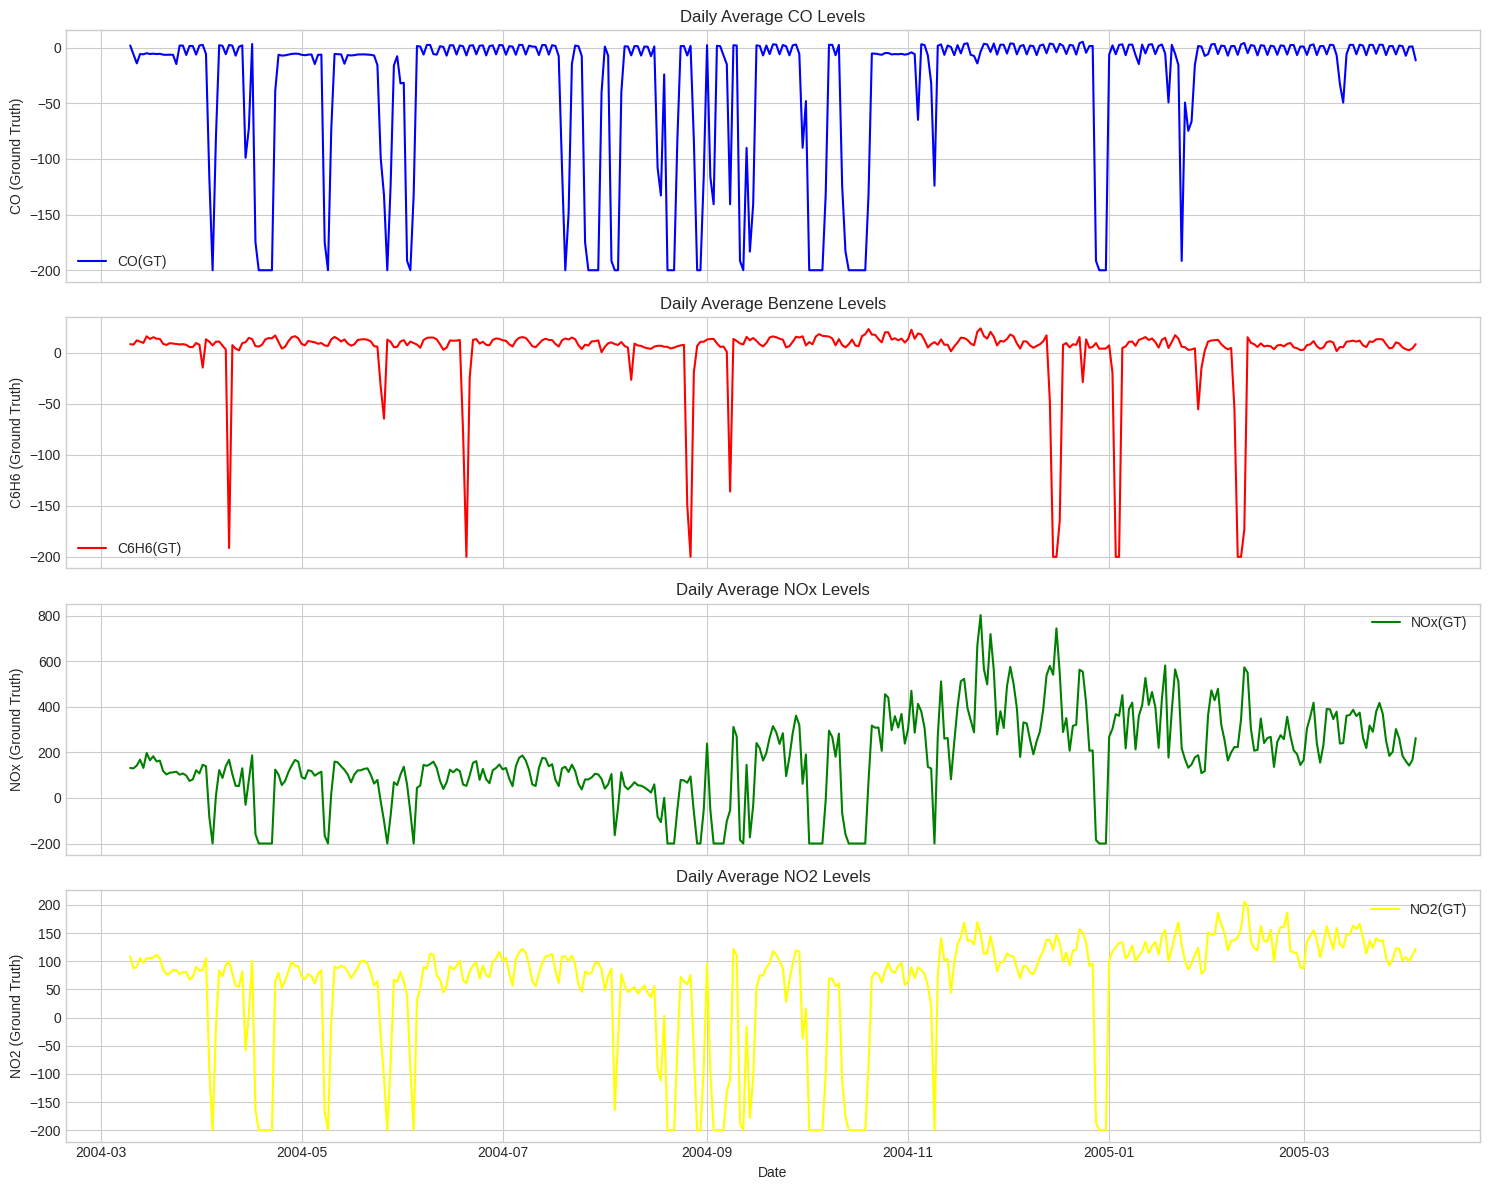

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), sharex=True)

# CO
axes[0].plot(daily_avg.index, daily_avg['CO(GT)'], label='CO(GT)', color='blue')
axes[0].set_ylabel('CO (Ground Truth)')
axes[0].set_title('Daily Average CO Levels')
axes[0].legend()

# Benzene
axes[1].plot(daily_avg.index, daily_avg['C6H6(GT)'], label='C6H6(GT)', color='red')
axes[1].set_ylabel('C6H6 (Ground Truth)')
axes[1].set_title('Daily Average Benzene Levels')
axes[1].legend()

# NOx
axes[2].plot(daily_avg.index, daily_avg['NOx(GT)'], label='NOx(GT)', color='green')
axes[2].set_ylabel('NOx (Ground Truth)')
axes[2].set_title('Daily Average NOx Levels')
axes[2].legend()
# NO2
axes[3].plot(daily_avg.index, daily_avg['NO2(GT)'], label='NO2(GT)', color='yellow')
axes[3].set_ylabel('NO2 (Ground Truth)')
axes[3].set_title('Daily Average NO2 Levels')
axes[3].legend()
plt.xlabel('Date')
plt.tight_layout()
plt.show()

## Box Plots to Identify Outliers

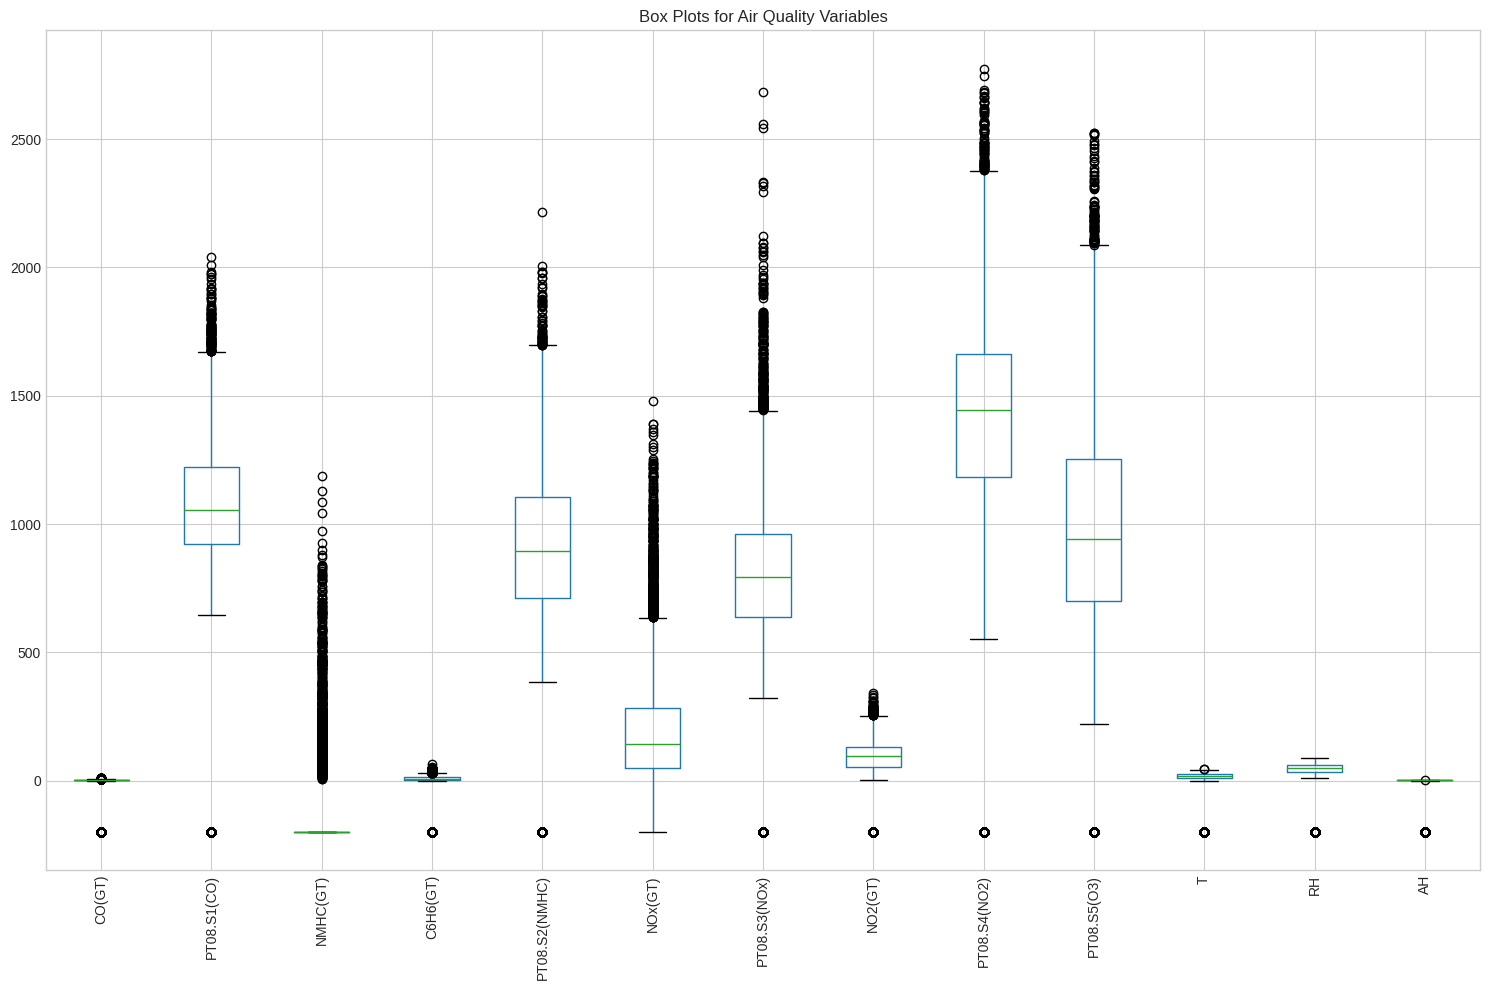

In [21]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Air Quality Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Correlation with Weather Variables

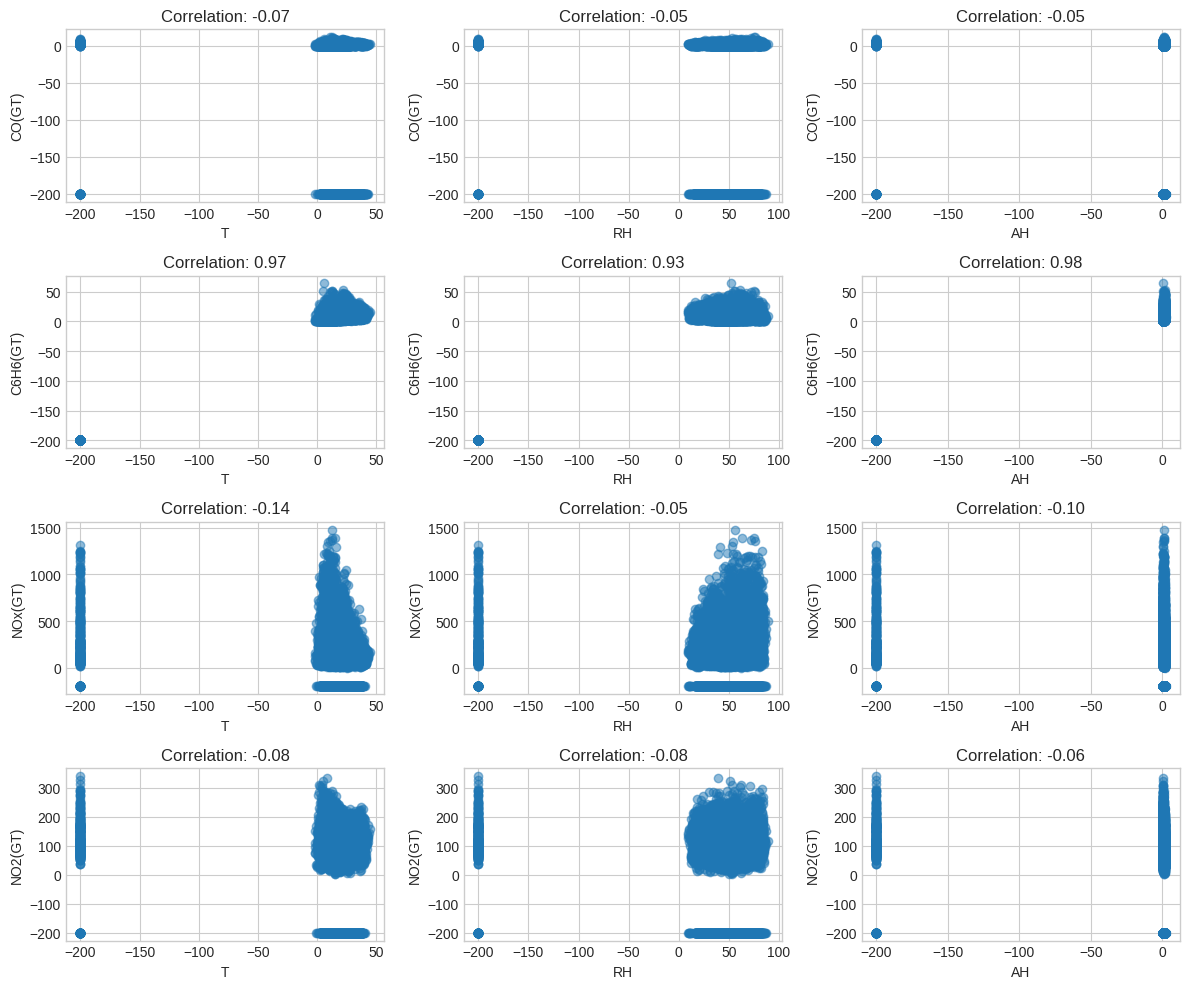

In [22]:
weather_vars = ['T', 'RH', 'AH']
pollutant_vars = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

plt.figure(figsize=(12, 10))
for i, pollutant in enumerate(pollutant_vars):
    for j, weather in enumerate(weather_vars):
        plt.subplot(len(pollutant_vars), len(weather_vars), i*len(weather_vars) + j + 1)
        plt.scatter(df[weather], df[pollutant], alpha=0.5)
        plt.xlabel(weather)
        plt.ylabel(pollutant)
        corr, _ = pearsonr(df[weather], df[pollutant])
        plt.title(f'Correlation: {corr:.2f}')

plt.tight_layout()
plt.show()

## Hourly Patterns (Average by Hour of Day)

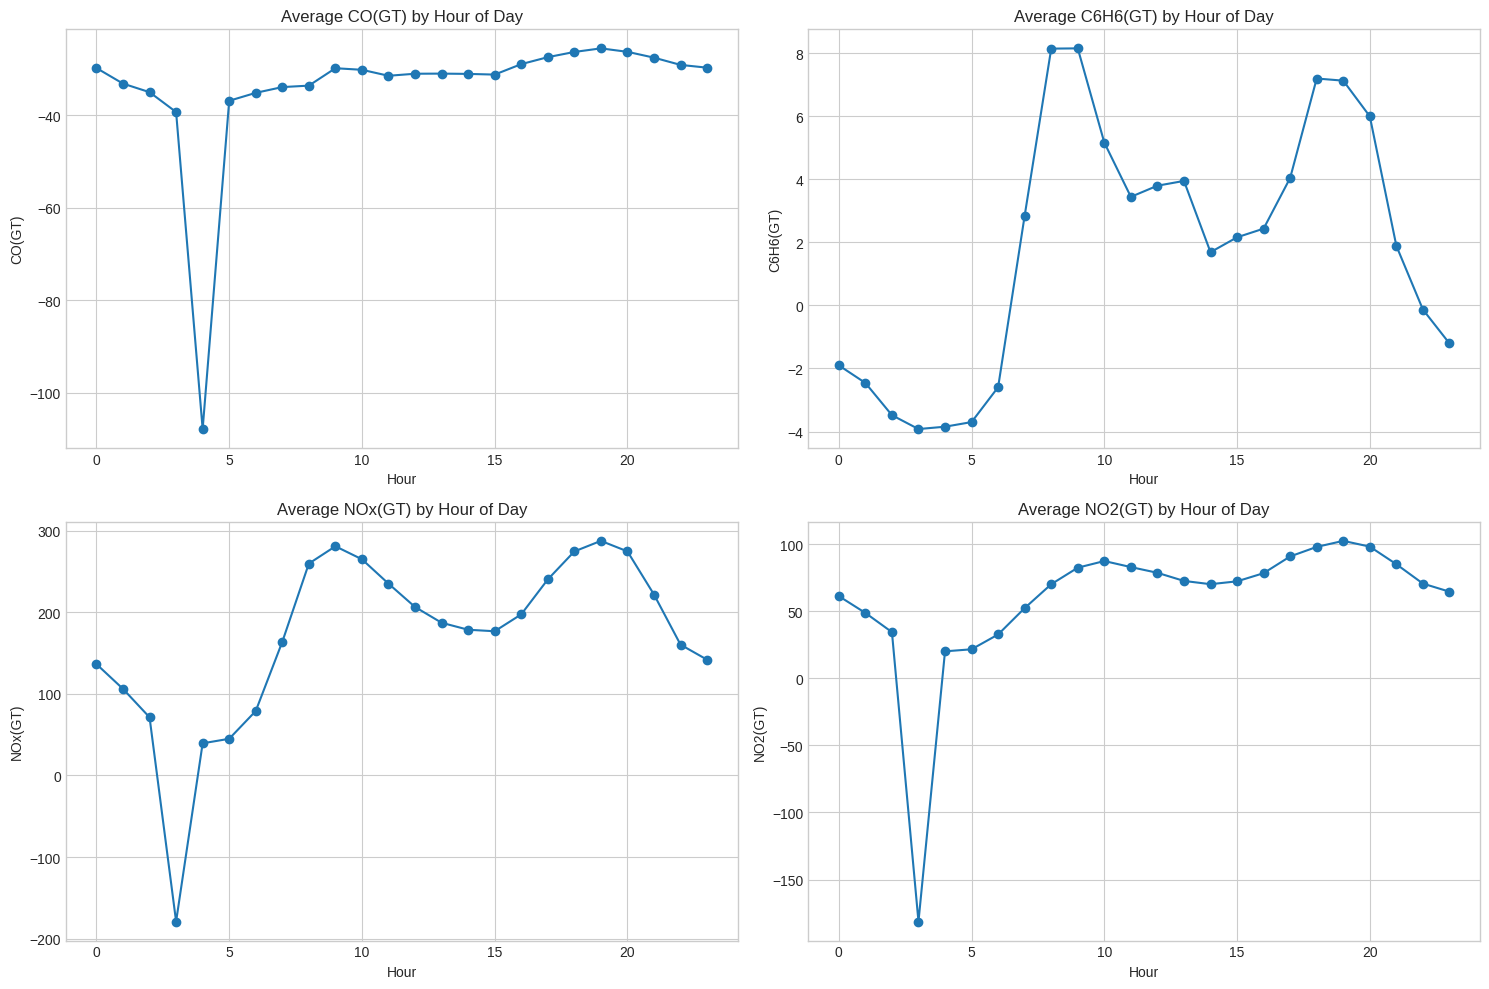

In [23]:
hourly_patterns = df.groupby(df.index.hour).mean()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], 1):
    plt.subplot(2, 2, i)
    plt.plot(hourly_patterns.index, hourly_patterns[col], marker='o')
    plt.title(f'Average {col} by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Weekly Patterns (Average by Day of Week)

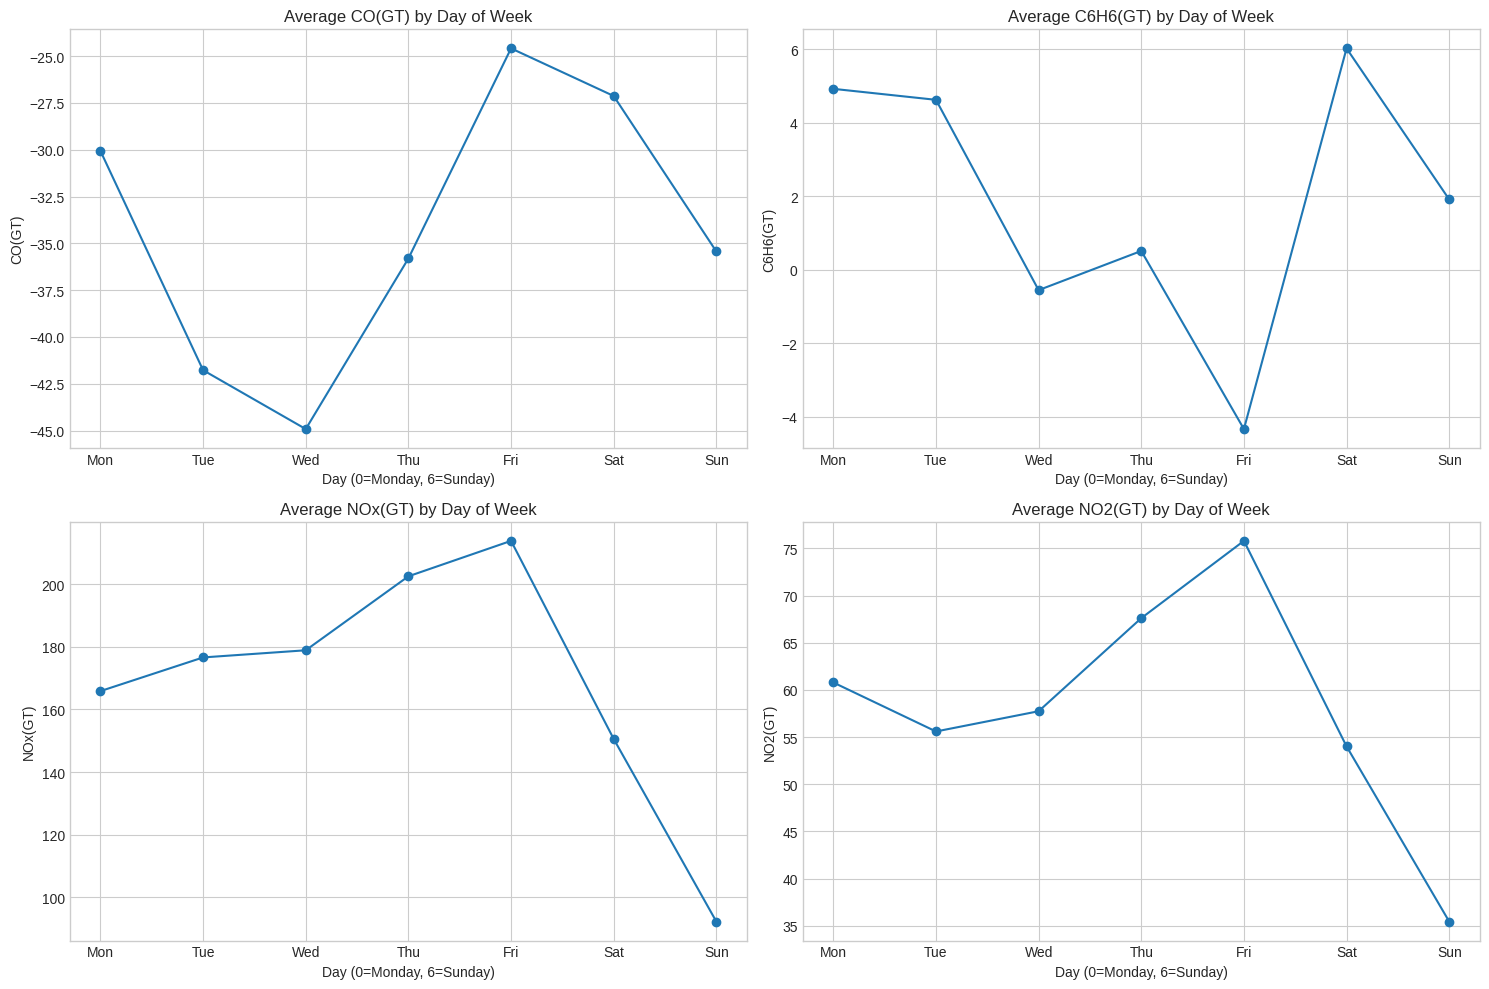

In [24]:
df['day_of_week'] = df.index.dayofweek
weekly_patterns = df.groupby('day_of_week').mean()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], 1):
    plt.subplot(2, 2, i)
    plt.plot(weekly_patterns.index, weekly_patterns[col], marker='o')
    plt.title(f'Average {col} by Day of Week')
    plt.xlabel('Day (0=Monday, 6=Sunday)')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

## Find Which Variables are Most Correlated With Each Pollutant

In [25]:
target_pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

for target in target_pollutants:
    correlations = []
    for col in df_features.columns:
        if col != target:
            corr, p_value = pearsonr(df_features[target], df_features[col])
            correlations.append((col, corr, p_value))
    
    # Sort by absolute correlation value
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\nTop correlations with {target}:")
    for col, corr, p_value in correlations[:]:
        print(f"{col}: r = {corr:.4f}, p = {p_value:.4e}")

# Print key findings
print("\nKey EDA Findings:")
print("1. Distributions of pollutants")
print("2. Temporal patterns in air quality")
print("3. Correlations between pollutants and weather variables")
print("4. Hourly and weekly patterns in pollutant concentrations")


Top correlations with CO(GT):
NO2(GT): r = 0.6711, p = 0.0000e+00
NOx(GT): r = 0.5265, p = 0.0000e+00
month: r = -0.1461, p = 8.5952e-46
NMHC(GT): r = 0.1284, p = 1.1509e-35
PT08.S3(NOx): r = -0.0900, p = 2.7692e-18
PT08.S5(O3): r = 0.0803, p = 7.2519e-15
hour: r = 0.0760, p = 1.8437e-13
PT08.S4(NO2): r = -0.0737, p = 9.3194e-13
T: r = -0.0689, p = 2.4619e-11
RH: r = -0.0482, p = 3.0533e-06
AH: r = -0.0459, p = 8.9552e-06
PT08.S1(CO): r = 0.0414, p = 6.1501e-05
day: r = -0.0326, p = 1.5926e-03
C6H6(GT): r = -0.0314, p = 2.4005e-03
dayofweek: r = 0.0307, p = 2.9822e-03
PT08.S2(NMHC): r = 0.0299, p = 3.7912e-03

Top correlations with C6H6(GT):
AH: r = 0.9846, p = 0.0000e+00
T: r = 0.9714, p = 0.0000e+00
RH: r = 0.9251, p = 0.0000e+00
PT08.S1(CO): r = 0.8527, p = 0.0000e+00
PT08.S4(NO2): r = 0.7747, p = 0.0000e+00
PT08.S2(NMHC): r = 0.7674, p = 0.0000e+00
PT08.S5(O3): r = 0.6413, p = 0.0000e+00
PT08.S3(NOx): r = 0.5122, p = 0.0000e+00
month: r = 0.0468, p = 6.0553e-06
hour: r = 0.0461, p

## Model Implementation and Evaluation

 Define target variables to predict

In [26]:
target_pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

Select features: sensor readings, weather variables, and time features

In [27]:
features = [col for col in df_features.columns if col not in target_pollutants]


## Initialize Models


--- Target: CO(GT) ---
Linear Regression: R² = 0.0830, MAE = 55.2682
Lasso Regression: R² = 0.0790, MAE = 55.5018
Ridge Regression: R² = 0.0831, MAE = 55.2598
Decision Tree: R² = 0.6326, MAE = 10.9078
Random Forest: R² = 0.7776, MAE = 14.4567
Extra Trees: R² = 0.8068, MAE = 13.7498
AdaBoost: R² = 0.1255, MAE = 54.6669
Support Vector Regression: R² = -0.1993, MAE = 34.9198
XGBoost: R² = 0.7724, MAE = 19.4857
CatBoost: R² = 0.7731, MAE = 20.4434
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 6549, number of used features: 13
[LightGBM] [Info] Start training from score -34.901435
LightGBM: R² = 0.7645, MAE = 19.4401

📈 SARIMAX: R² = 0.0789, MAE = 55.1387

 Best DBO Params: n_estimators=131, max_depth=17
 Best DBO MSE: 1340.5240

 Final RF R² Score: 0.7698
 Final RF MAE: 15.1303


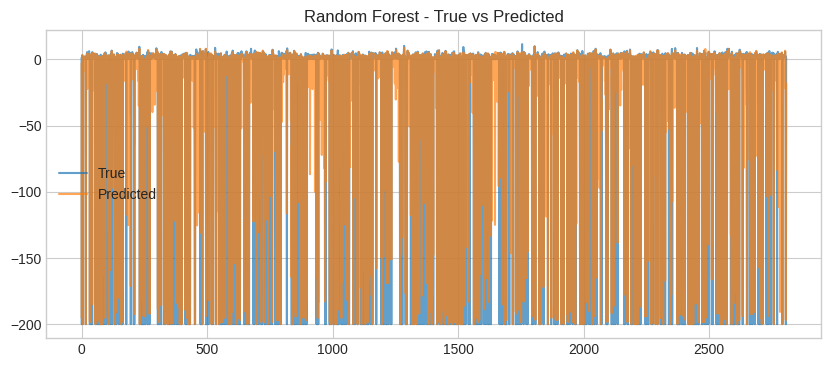


--- Target: C6H6(GT) ---
Linear Regression: R² = 0.9992, MAE = 0.8209
Lasso Regression: R² = 0.9979, MAE = 1.1855
Ridge Regression: R² = 0.9992, MAE = 0.8197
Decision Tree: R² = 1.0000, MAE = 0.0188
Random Forest: R² = 1.0000, MAE = 0.0173
Extra Trees: R² = 1.0000, MAE = 0.0268
AdaBoost: R² = 0.9984, MAE = 1.3720
Support Vector Regression: R² = 0.9198, MAE = 2.5972
XGBoost: R² = 0.9999, MAE = 0.0837
CatBoost: R² = 0.9999, MAE = 0.1900
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 6549, number of used features: 13
[LightGBM] [Info] Start training from score 1.771614
LightGBM: R² = 0.9999, MAE = 0.0734

📈 SARIMAX: R² = 0.9992, MAE = 0.8149

 Best DBO Params: n_estimators=162, max_depth=13
 Best DBO MSE: 0.0134

 Final RF R² Score: 1.0000
 Final RF MAE: 0.0171


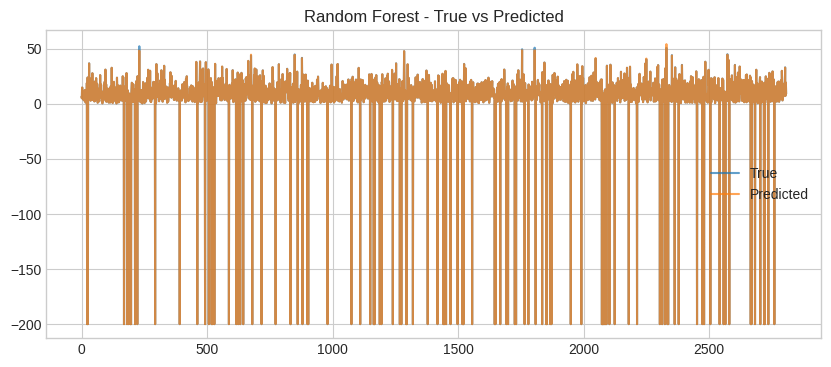


--- Target: NOx(GT) ---
Linear Regression: R² = 0.4892, MAE = 124.8146
Lasso Regression: R² = 0.4845, MAE = 125.9040
Ridge Regression: R² = 0.4894, MAE = 124.7711
Decision Tree: R² = 0.6735, MAE = 72.5360
Random Forest: R² = 0.8408, MAE = 60.9151
Extra Trees: R² = 0.8535, MAE = 58.5666
AdaBoost: R² = 0.5304, MAE = 135.6993
Support Vector Regression: R² = 0.3555, MAE = 130.9413
XGBoost: R² = 0.8727, MAE = 57.0830
CatBoost: R² = 0.8910, MAE = 51.8105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 6549, number of used features: 13
[LightGBM] [Info] Start training from score 167.581768
LightGBM: R² = 0.8641, MAE = 59.6507

📈 SARIMAX: R² = 0.4860, MAE = 125.8907

 Best DBO Params: n_estimators=182, max_depth=19
 Best DBO MS

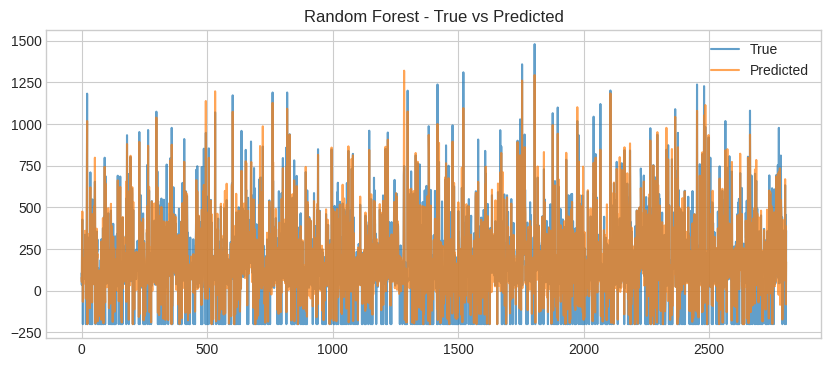


--- Target: NO2(GT) ---
Linear Regression: R² = 0.2532, MAE = 80.6421
Lasso Regression: R² = 0.2508, MAE = 80.4484
Ridge Regression: R² = 0.2534, MAE = 80.6035
Decision Tree: R² = 0.6879, MAE = 27.7831
Random Forest: R² = 0.8346, MAE = 27.7319
Extra Trees: R² = 0.8579, MAE = 26.7661
AdaBoost: R² = 0.0755, MAE = 112.6562
Support Vector Regression: R² = 0.0860, MAE = 64.1499
XGBoost: R² = 0.8361, MAE = 31.3147
CatBoost: R² = 0.8580, MAE = 28.7852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 6549, number of used features: 13
[LightGBM] [Info] Start training from score 57.388609
LightGBM: R² = 0.8409, MAE = 30.5780

📈 SARIMAX: R² = 0.2456, MAE = 81.1348

 Best DBO Params: n_estimators=200, max_depth=20
 Best DBO MSE: 2577.2844

 Final RF R² Score: 0.8382
 Final RF MAE: 27.5075


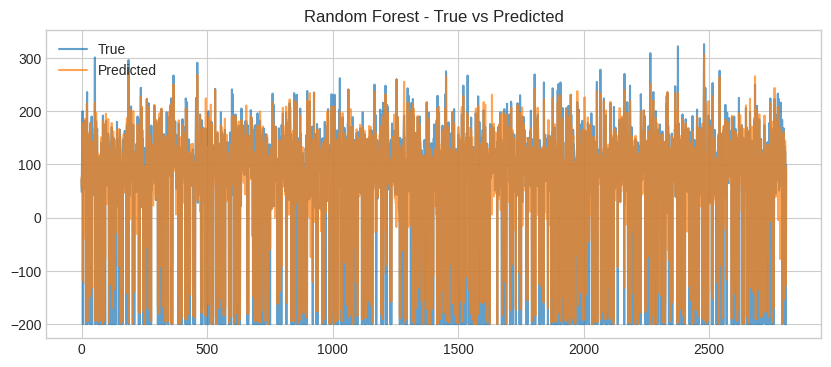

In [28]:
warnings.filterwarnings("ignore")

# Define sequence length
sequence_length = 30

# Define traditional models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

# Define target pollutants
target_pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Select features
features = [col for col in df_features.columns if col not in target_pollutants]

# Function to create sequences for GRU
def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

# Model evaluation loop
for target in target_pollutants:
    print(f"\n--- Target: {target} ---")
    X = df_features[features]
    y = df_features[target]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train/evaluate traditional models
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name}: R² = {r2:.4f}, MAE = {mae:.4f}")

    # SARIMAX
    try:
        sarimax_model = SARIMAX(y_train, exog=X_train_scaled, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarimax_result = sarimax_model.fit(disp=False)
        y_pred_sarimax = sarimax_result.forecast(steps=len(y_test), exog=X_test_scaled)
        r2_sarimax = r2_score(y_test, y_pred_sarimax)
        mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
        print(f"\n📈 SARIMAX: R² = {r2_sarimax:.4f}, MAE = {mae_sarimax:.4f}")
    except Exception as e:
        print(f"SARIMAX Failed: {e}")

    # Dung Beetle Optimizer (DBO)
    class DBO:
        def __init__(self, func, dim, lb, ub, pop_size=10, max_iter=20):
            self.func = func
            self.dim = dim
            self.lb = np.array(lb)
            self.ub = np.array(ub)
            self.pop_size = pop_size
            self.max_iter = max_iter

        def optimize(self):
            X = np.random.uniform(self.lb, self.ub, (self.pop_size, self.dim))
            fitness = np.array([self.func(ind) for ind in X])
            best_idx = np.argmin(fitness)
            X_best = X[best_idx].copy()
            fit_best = fitness[best_idx]

            for t in range(1, self.max_iter+1):
                for i in range(self.pop_size):
                    alpha = random.choice([-1, 1])
                    k = np.random.uniform(0, 0.2)
                    b = np.random.uniform(0, 1)
                    delta_x = np.abs(X[i] - X_best)
                    X[i] += alpha * k * X[i] + b * delta_x
                    X[i] = np.clip(X[i], self.lb, self.ub)
                    fit = self.func(X[i])
                    if fit < fit_best:
                        X_best = X[i].copy()
                        fit_best = fit
            return X_best, fit_best

    # Objective for Random Forest
    def objective(params):
        n_estimators = int(params[0])
        max_depth = int(params[1])
        
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return mean_squared_error(y_test, y_pred)

    # Run DBO
    dbo = DBO(
        func=objective,
        dim=2,
        lb=[50, 3],     
        ub=[200, 20],   
        pop_size=5,
        max_iter=5
    )

    best_params, best_mse = dbo.optimize()
    best_estimators = int(best_params[0])
    best_depth = int(best_params[1])

    print(f"\n Best DBO Params: n_estimators={best_estimators}, max_depth={best_depth}")
    print(f" Best DBO MSE: {best_mse:.4f}")

    # Final Random Forest Model
    model = RandomForestRegressor(n_estimators=best_estimators, max_depth=best_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    r2_rf = r2_score(y_test, y_pred)
    mae_rf = mean_absolute_error(y_test, y_pred)

    print(f"\n Final RF R² Score: {r2_rf:.4f}")
    print(f" Final RF MAE: {mae_rf:.4f}")

    # Plot Prediction
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='True', alpha=0.7)
    plt.plot(y_pred, label='Predicted', alpha=0.7)
    plt.title("Random Forest - True vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()

    

****Implementing GRU Model****

[I 2025-04-20 16:52:11,424] A new study created in memory with name: no-name-d5f406ef-5774-414d-98cf-306ccd553046



--- Target: CO(GT) ---


  0%|          | 0/10 [00:00<?, ?it/s]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:17,193] Trial 0 finished with value: 0.6065895465521468 and parameters: {'units': 96, 'learning_rate': 0.0005815111721294829, 'batch_size': 64}. Best is trial 0 with value: 0.6065895465521468.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:19,593] Trial 1 finished with value: 0.6986573737737414 and parameters: {'units': 96, 'learning_rate': 0.005551865571077543, 'batch_size': 64}. Best is trial 1 with value: 0.6986573737737414.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:22,476] Trial 2 finished with value: 0.5882575099804983 and parameters: {'units': 32, 'learning_rate': 0.0006042798838428932, 'batch_size': 32}. Best is trial 1 with value: 0.6986573737737414.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:24,810] Trial 3 finished with value: 0.6235127619123922 and parameters: {'units': 32, 'learning_rate': 0.002275744047601029, 'batch_size': 64}. Best is trial 1 with value: 0.6986573737737414

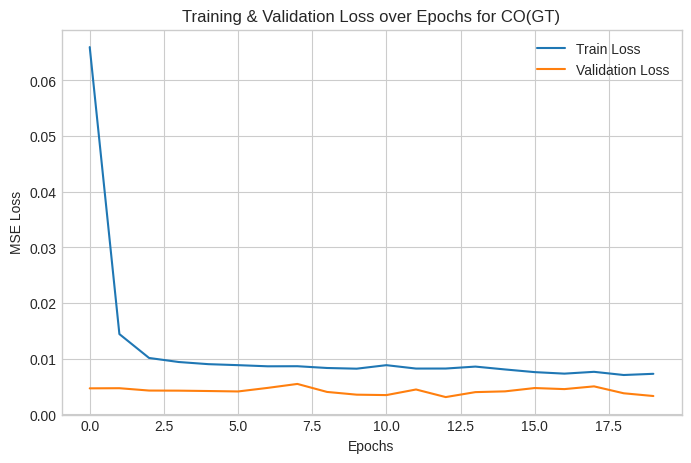

[I 2025-04-20 16:52:44,476] A new study created in memory with name: no-name-a38d3791-36e0-47af-97b1-d6d774900497



--- Target: C6H6(GT) ---


  0%|          | 0/10 [00:00<?, ?it/s]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:47,403] Trial 0 finished with value: 0.6948958955996165 and parameters: {'units': 64, 'learning_rate': 0.006526735181567365, 'batch_size': 32}. Best is trial 0 with value: 0.6948958955996165.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:49,824] Trial 1 finished with value: 0.7158280493286203 and parameters: {'units': 96, 'learning_rate': 0.0031423732525899992, 'batch_size': 64}. Best is trial 1 with value: 0.7158280493286203.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:52,206] Trial 2 finished with value: 0.6832541882872927 and parameters: {'units': 50, 'learning_rate': 0.00803106533255696, 'batch_size': 64}. Best is trial 1 with value: 0.7158280493286203.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:52:54,571] Trial 3 finished with value: 0.6523983418457113 and parameters: {'units': 64, 'learning_rate': 0.002928769091907905, 'batch_size': 64}. Best is trial 1 with value: 0.7158280493286203.


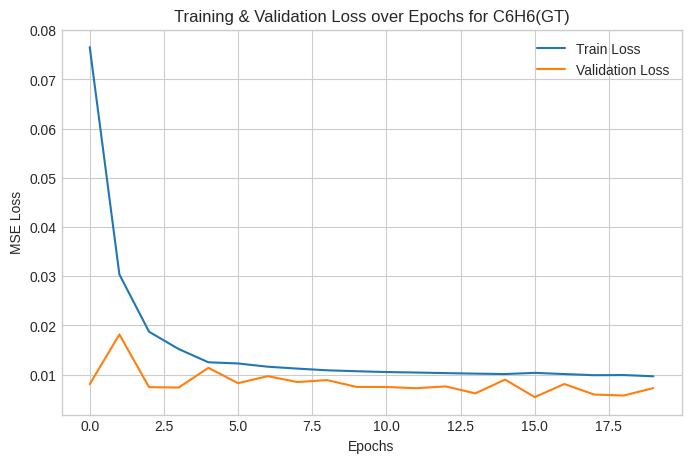

[I 2025-04-20 16:53:17,062] A new study created in memory with name: no-name-07db69ae-e26b-4b7a-8c57-b317e919fc39



--- Target: NOx(GT) ---


  0%|          | 0/10 [00:00<?, ?it/s]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:53:20,043] Trial 0 finished with value: 0.6666110115229935 and parameters: {'units': 64, 'learning_rate': 0.0020922220081119984, 'batch_size': 32}. Best is trial 0 with value: 0.6666110115229935.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[I 2025-04-20 16:53:24,180] Trial 1 finished with value: 0.5734135473927187 and parameters: {'units': 64, 'learning_rate': 0.0007818025146071414, 'batch_size': 32}. Best is trial 0 with value: 0.6666110115229935.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:53:27,141] Trial 2 finished with value: 0.6696459717628342 and parameters: {'units': 32, 'learning_rate': 0.002603996994903242, 'batch_size': 32}. Best is trial 2 with value: 0.6696459717628342.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[I 2025-04-20 16:53:30,183] Trial 3 finished with value: 0.5552694181336368 and parameters: {'units': 64, 'learning_rate': 0.0002986508726894805, 'batch_size': 32}. Best is trial 2 with value: 0.669645971762834

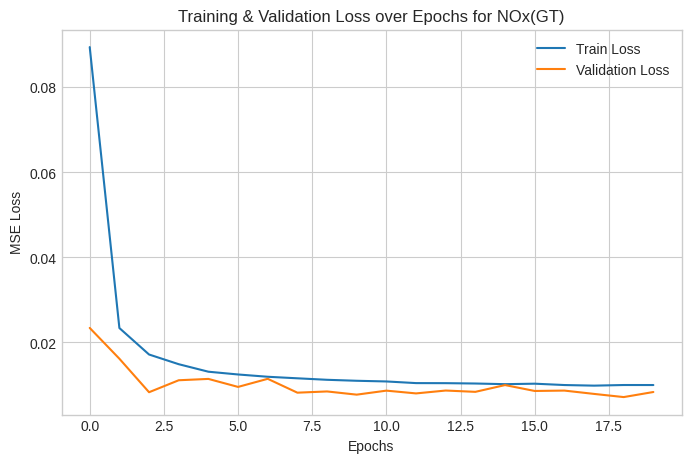

[I 2025-04-20 16:53:50,171] A new study created in memory with name: no-name-381e6daa-66f0-4379-8985-7f2ac84297e0



--- Target: NO2(GT) ---


  0%|          | 0/10 [00:00<?, ?it/s]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:53:53,093] Trial 0 finished with value: 0.7352412073638477 and parameters: {'units': 64, 'learning_rate': 0.003535066687100544, 'batch_size': 32}. Best is trial 0 with value: 0.7352412073638477.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:53:56,984] Trial 1 finished with value: 0.6738560561203393 and parameters: {'units': 64, 'learning_rate': 0.0003149607927722291, 'batch_size': 16}. Best is trial 0 with value: 0.7352412073638477.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[I 2025-04-20 16:53:59,919] Trial 2 finished with value: 0.608319054012322 and parameters: {'units': 64, 'learning_rate': 0.00010264121567714198, 'batch_size': 32}. Best is trial 0 with value: 0.7352412073638477.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[I 2025-04-20 16:54:03,742] Trial 3 finished with value: 0.7094209869191436 and parameters: {'units': 50, 'learning_rate': 0.0036355206980889765, 'batch_size': 32}. Best is trial 0 with value: 0.735241207363847

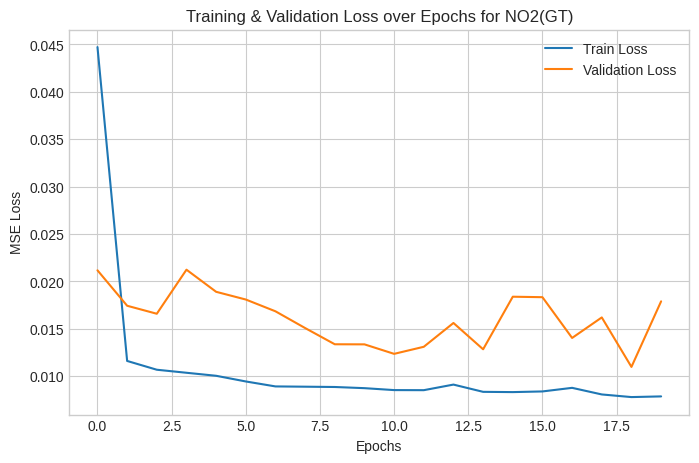

In [29]:
#  Load dataset
df = pd.read_csv('/kaggle/input/air-quality-data-set/AirQuality.csv', sep=';', decimal=',')
df = df.dropna(axis=1, how='all').dropna()
df = df.replace(-200, np.nan).dropna()
df = df.drop(columns=['Date', 'Time'])

# Define target pollutants
target_pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

#  Sequence creation function
def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

# Loop through each target pollutant
for target_pollutant in target_pollutants:
    print(f"\n--- Target: {target_pollutant} ---")

    #  Define features and target
    features = df.drop(columns=[target_pollutant]).values
    target = df[target_pollutant].values.reshape(-1, 1)

    #  Normalize
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    features_scaled = scaler_x.fit_transform(features)
    target_scaled = scaler_y.fit_transform(target)

    # Create sequences
    X, y = create_sequences(features_scaled, target_scaled, seq_length=24)

    #  70-30 train-test split
    split = int(0.7 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    #  Objective Function for Optuna
    def objective(trial):
        units = trial.suggest_categorical('units', [32, 50, 64, 96])
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
        batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

        model = Sequential([
            GRU(units, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(1)
        ])
        model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

        model.fit(
            X_train, y_train,
            epochs=20,
            batch_size=batch_size,
            verbose=0,
            validation_split=0.1
        )

        y_pred_scaled = model.predict(X_test)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = scaler_y.inverse_transform(y_test)

        r2 = r2_score(y_true, y_pred)
        return r2  #  Maximize R²

    #  Optuna Study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=10, show_progress_bar=True)

    #  Best Trial Summary
    print("\n Best Trial:")
    print(f"R²: {study.best_value:.4f}")
    print("Best Hyperparameters:", study.best_params)

    #  Re-train model using best params
    best_params = study.best_params
    model = Sequential([
        GRU(best_params['units'], input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=best_params['learning_rate']))

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=best_params['batch_size'],
        validation_split=0.1,
        verbose=0
    )
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print(f"\n RMSE: {rmse:.3f}")
    print(f" Final R² Score: {r2:.4f}")

    #  Plot Training Loss
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Training & Validation Loss over Epochs for {target_pollutant}")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()